# Arboles de regresion

In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("./vinos/Advertising.csv")

In [5]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
columns = data.columns.values.tolist()
columns

['TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
predictoras = columns[:3]
predictoras

['TV', 'Radio', 'Newspaper']

In [8]:
target = columns[3:4]
target

['Sales']

In [9]:
X = data[predictoras]
Y = data[target]

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
regtree=DecisionTreeRegressor(min_samples_split=20, max_depth=5, min_samples_leaf=10,random_state=0) #min_samples_split (muestras que va tomar). Vamos a podar el arbol (max_depth). random_state es como la semilla. min_samples_leaf=10 cuantos valores debe tener una hoja como minimo para ser consideradas para no overfitear

In [12]:
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [13]:
preds = regtree.predict(data[predictoras])

In [14]:
data["preds"] = preds

In [15]:
data.head()

,TV,Radio,Newspaper,Sales,preds
0,230.1,37.8,69.2,22.1,22.700000
1,44.5,39.3,45.1,10.4,13.100000
2,17.2,45.9,69.3,9.3,7.813333
3,151.5,41.3,58.5,18.5,17.958824
4,180.8,10.8,58.4,12.9,13.872727


In [16]:
from sklearn.tree import export_graphviz

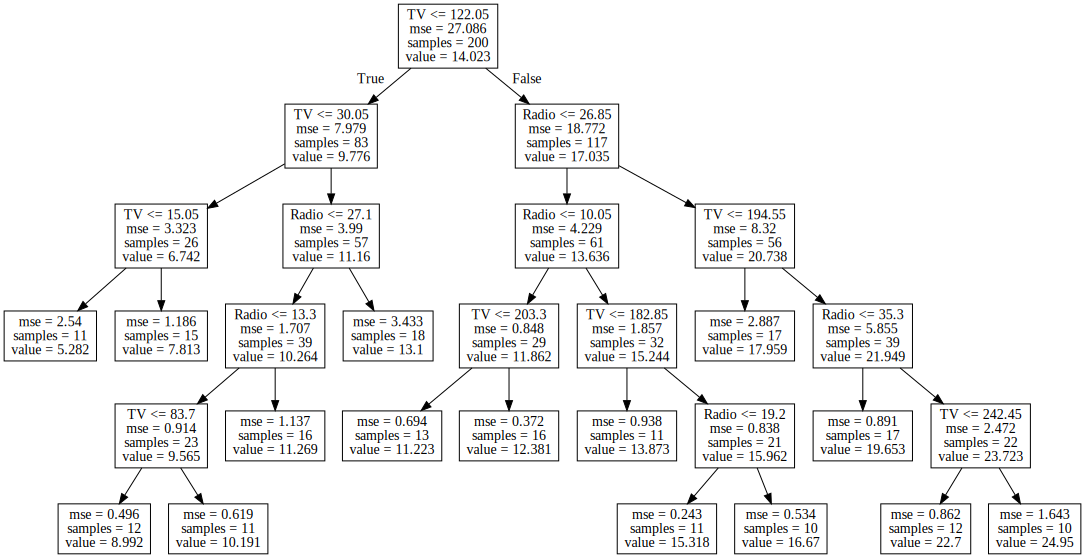

In [17]:
with open("ads_reg_tree.dot", "w") as dotfile:
    export_graphviz(regtree,out_file=dotfile, feature_names=predictoras)
    dotfile.close()
import os
from graphviz import Source
file = open("ads_reg_tree.dot", "r")
text = file.read()
Source(text)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
cv = KFold(n_splits=10, shuffle=True, random_state=1) #tabla de crossvalidation
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv = cv, n_jobs=2) #scoring tambien se puede poner el "r2"

In [20]:
print(scores)

[-2.06586118 -1.39585399 -2.26692841 -3.95471893 -1.95963853 -2.81407918
 -1.23843398 -2.81365247 -2.59537782 -2.7650793 ]


In [21]:
score = scores.mean()
print(score)

-2.386962378415744


In [22]:
regtree.feature_importances_

array([0.62338592, 0.37661408, 0.        ])

In [24]:
list(zip(predictoras, regtree.feature_importances_))

[('TV', 0.6233859166690897), ('Radio', 0.3766140833309103), ('Newspaper', 0.0)]

In [25]:
# #Random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor(n_jobs=4, oob_score=True, n_estimators=1000)
forest.fit(X,Y)

/Users/oscarrodas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [32]:
data["f predict"] = forest.predict(X)
data.head()

,TV,Radio,Newspaper,Sales,preds,f predict
0,230.1,37.8,69.2,22.1,22.700000,21.9839
1,44.5,39.3,45.1,10.4,13.100000,10.6631
2,17.2,45.9,69.3,9.3,7.813333,8.8693
3,151.5,41.3,58.5,18.5,17.958824,18.2924
4,180.8,10.8,58.4,12.9,13.872727,13.3886


In [33]:
forest.oob_score_

0.9816693264344818